In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize']=[10,7]

In [ ]:
# show same images from the non-notebook example
import pycuda.autoinit
from pycuda import gpuarray
from matching import circle_image
import lagomorph as lm
width = 128
source = gpuarray.to_gpu(circle_image(width, width, width//2, width*3//8, width//4))
#target = gpuarray.to_gpu(circle_image(width, width, width*5//8, width//2, width//4))
target = gpuarray.to_gpu(circle_image(width, width, width//2, width*5//8, width//4))

In [ ]:
plt.imshow(source.get().squeeze(), cmap='gray')
plt.title('Source')
_=plt.colorbar()
plt.figure()
plt.imshow(target.get().squeeze(), cmap='gray')
plt.title('Target')
_=plt.colorbar()

In [ ]:
alpha = 0.3
beta = 0.01
gamma = 0.01
import lagomorph.matching as lmm
m0 = lmm.match(source, target, alpha, beta, gamma, reg_weight=.1, step_size=10, num_iters=100)

In [ ]:
momscale = 10/gamma
lm.quiver(m0*momscale)
plt.title(f"m0 (scaled by {momscale})")

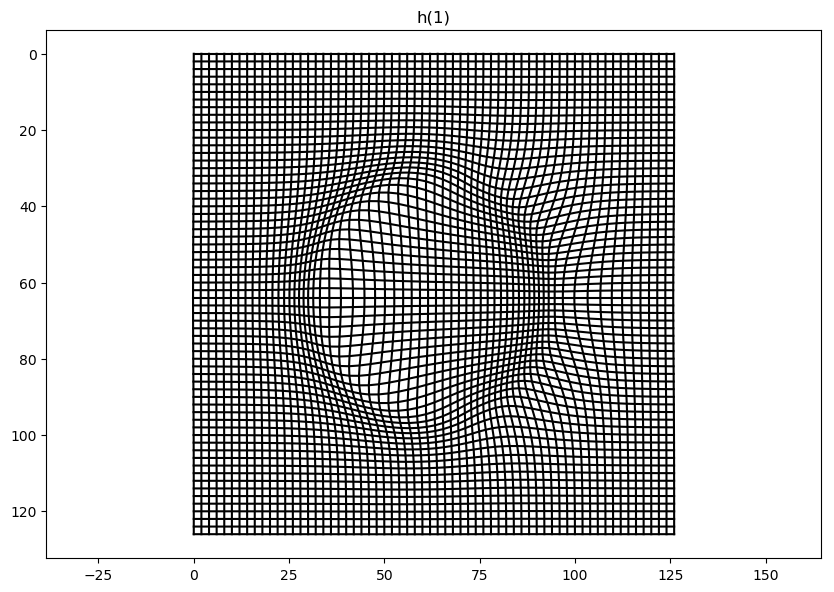

In [21]:
metric = lm.FluidMetric(alpha=alpha, beta=beta, gamma=gamma, shape=m0.shape,    
            allocator=source.allocator)
h = lm.expmap(m0, metric)
lm.gridplot(h) #, 16, 16)
_=plt.title('h(1)')